In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Actual labels (used only for evaluation)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.cluster import KMeans

# Try clustering into 3 clusters (we know iris has 3 actual classes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Compare clustering labels with actual class labels
ari = adjusted_rand_score(y, labels)
silhouette = silhouette_score(X_scaled, labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index: 0.6201
Silhouette Score: 0.4599


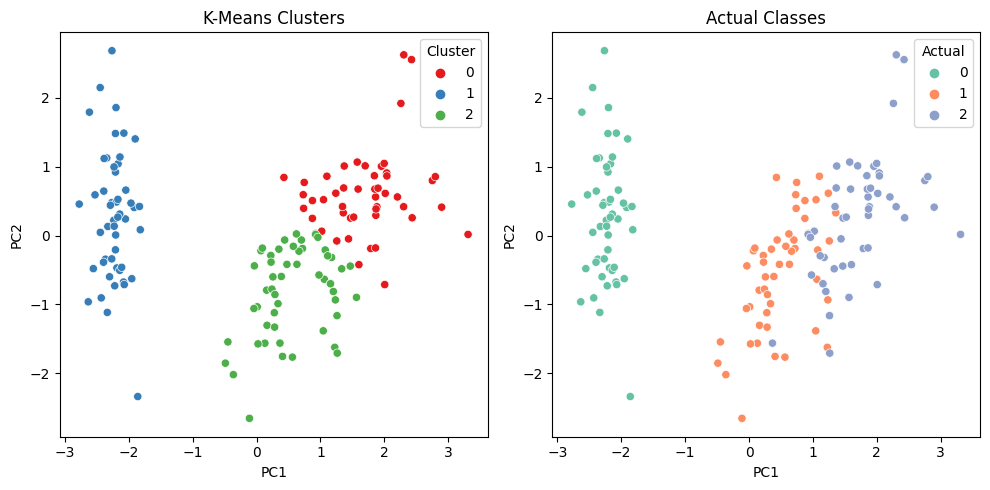

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = labels
df_plot['Actual'] = y

plt.figure(figsize=(10, 5))

# Plot predicted clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title("K-Means Clusters")

# Plot actual labels
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Actual', palette='Set2')
plt.title("Actual Classes")

plt.tight_layout()
plt.show()